### Dataset is a Psuedo Facebook dataset 
#### Source- https://www.kaggle.com/sheenabatra/facebook-data.
#### Number of Records = 100k records
Columns are - 'userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure', 'friend_count', 'friendships_initiated', 'likes', 'likes_received', 'mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received'

#### I would like to explore the below business questions-

1) Who are the popular users of Facebook? Based on the popular users we can customize or enhance our marketing/ features on Facebook app  --> Check popularity by user count , per friend count or per likes activity - Based on the answers we can generate strategies to enhance products or create opportunities for advertising related prodocuts or promoting events/communities

2) Which is the preferable medium for using Facebook account? Does it vary by users? How can we leverage this information to improve our Mobile vs Web applications? Based on age group or gender usage on each medium like website or mobile- we can alter the applications to have features favorable to it's popular users. 

3) Since only user data of birth is available - Can we use date of birth to derive zodiac information and find patterns in certain user groups - can we leverage this to build a new astrology or compatibility app/game?



In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


# Extract Data

In [2]:
df = pd.read_csv('./Data/fbdata.csv')

In [3]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
df.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [5]:
df.shape

(99003, 15)

In [6]:
df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [7]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


# Handle Missing Values

In [8]:
# Check for Missing Data
df.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [9]:
#Check values of gender
df.gender.value_counts()

male      58574
female    40254
Name: gender, dtype: int64

In [10]:
# Let us name null gender as unknown - this is to check if we fnd any new pattern among the users who left gender as null
df.loc[df[pd.isnull(df.gender)].index,'gender'] = "unknown"

In [11]:
df.gender.value_counts()

male       58574
female     40254
unknown      175
Name: gender, dtype: int64

In [12]:
#Since there are only 2 values among 99k missing in tenure- we can delete the rows
df = df[pd.notnull(df.tenure)]

In [13]:
df.shape

(99001, 15)

In [14]:
# check missing values to ensure they are all removed
df.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

# Data Exploratory Analysis

## Age analysis

C:\Users\Maddy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


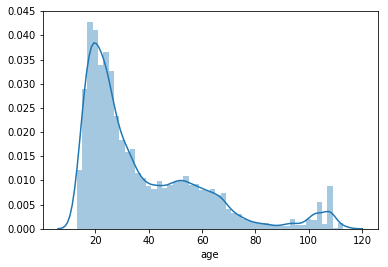

In [15]:
# check age distribution

sns.distplot(df.age)

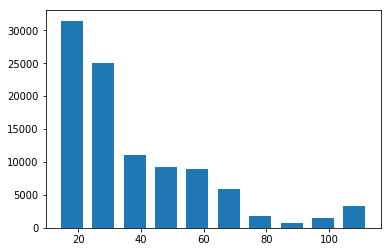

In [16]:
plt.hist(df.age, bins=10, label='age', rwidth=0.7)
plt.show()

In [17]:
df.age.describe()

count    99001.000000
mean        37.279048
std         22.588436
min         13.000000
25%         20.000000
50%         28.000000
75%         50.000000
max        113.000000
Name: age, dtype: float64

In [18]:
#Create a new column to convert age into age groups-

df['age_group'] = df.apply(lambda row: np.floor(row.age/10), axis=1 )

In [19]:
df.age_group.value_counts()

2.0     30699
1.0     20983
3.0     13372
5.0      9537
4.0      8837
6.0      7238
10.0     3758
7.0      2478
9.0       965
8.0       881
11.0      253
Name: age_group, dtype: int64

In [20]:
#Verify agegroup conversion was successful
df[['age','age_group']].head(10)

,age,age_group
0,14,1.0
1,14,1.0
2,14,1.0
3,14,1.0
4,14,1.0
5,14,1.0
6,13,1.0
7,13,1.0
8,13,1.0
9,13,1.0


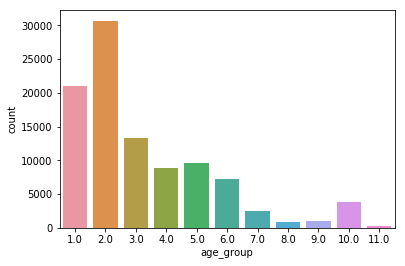

In [21]:
# Check how agegroup is distributed
sns.countplot(df.age_group)

## Popular agegroup = 2 - People in 20s - between 20-29, Second popular are teens and then third popualr are users in Thirties. 

### Retired users are minimal- a spike in users who crosses 100 years - Could be a way the family friends celebrate their lives or some accounts could be maintained by loved ones post their demise?

## Let us check how it varies per gender

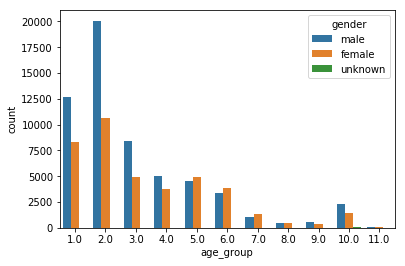

In [22]:
# Check how agegroup is distributed
sns.countplot(df.age_group, hue=df.gender)

## Answer to Question 1) 
### Popularity can be broken to 
##### 1) How many fb users of a certain category 
##### 2) How many active users on fb of a certain category?

### To answer Popularity by user accounts - above graph suggests the following-
#### Males are More prone to having a FB account than Females - especially for the age groups - from teens through middle age - under 50
#### Older Women > 50 seem to pick up on owning FB accounts than Men

From this pattern I would like to believe that women in 30s-40s are more occupied due to families or chores or may be even illiteracy in developing countries and may not have the time or access to technology or Social Media. 
But Hey! This is just my theory and Remember--
### Correlation does not imply Causation!! :)

In [23]:
# Next let us see who are the most active fb users?

In [24]:
df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received', 'age_group'],
      dtype='object')

In [25]:
# to check activity - we can check friend count but having more friends doesn't necessarily mean more activity -
#So we can check How many friendships initiated? , how many likes and likes received overall
# or we can just see base don overall likes count.

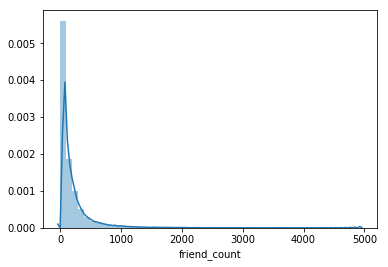

In [26]:
sns.distplot(df.friend_count)

Text(0.5, 1.0, 'FriendCount Histogram')

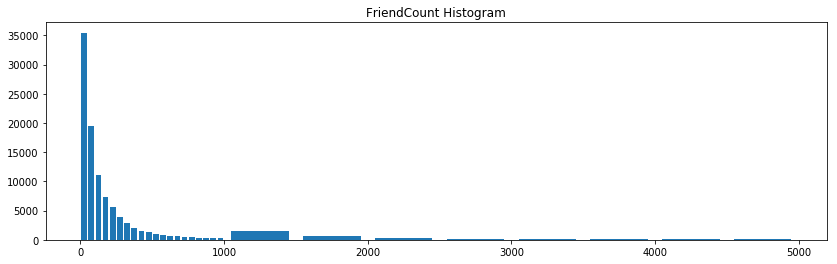

In [27]:
# Histogram of Friendcount- Lets bin them into groups and find out around how many friends do most users have?
binlist = np.arange(0,1000,50)
friendcount_bins = list(binlist)
friendcount_bins.extend(list(np.arange(1000,5500,500)))
figure = plt.figure(figsize=(14,4))
plt.hist(df.friend_count, bins=friendcount_bins, rwidth = 0.8)

# Add labels
plt.title("FriendCount Histogram")


In [28]:
# From above graph - Maximum users have friends 
round((df[df.friend_count<=200].shape[0]/df.shape[0])*100)

74

### 74% of users had less than 200 friends

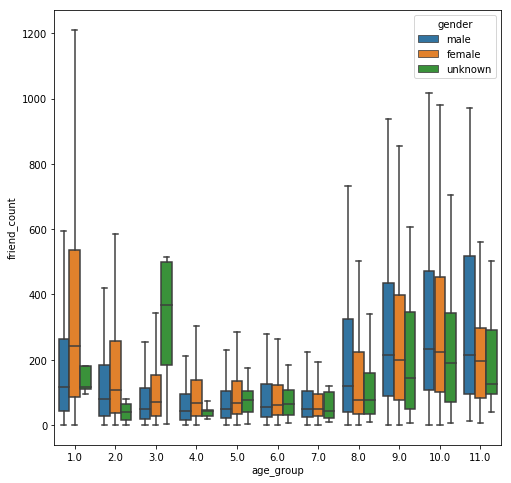

In [29]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df.age_group, y=df.friend_count, hue=df.gender, showfliers=False)

# Above Boxplot is agegroup versus friend_count - per gender

###### Observations- 
#####  1) Although Male user count was higher than female user count for age groups 1-4, FriendCount is contradictory.
##### 2) Younger Females have More friends than Males - 
###### 2a) Teenage girls tend to have twice or more number of friends than their male counterparts
###### 2b) With age Number of friends reduce across the genders
###### 2c) People have least social circle in mid life to retirement start - 40s to 70s - Probably due to a busy life balancing work-life!   
###### 2d) There is a spike in friend count in Old age > 80 - Probably due to Retirement But Retired Men have more friends than Retired women
###### 2e) Users who list Gender as neither male or female surge in the age between 30-39 - This may have factored due to certain life changing activites/revelations or involving in certain events/communities - Again Correlation does not lead to Causation! Just my theories..
 
### Answer 1b) Popularity w.r.t Friends - 
###### 1) Teenage girls followed by young women in 20s
###### 2) Users of Unknown gender in 30s
###### 3) Retired Communities

In [30]:
# Let us check Activity from likes - likes received and likes sent

In [31]:
df['total_likes'] = df.apply(lambda row: int(row.likes)+int(row.likes_received), axis=1)

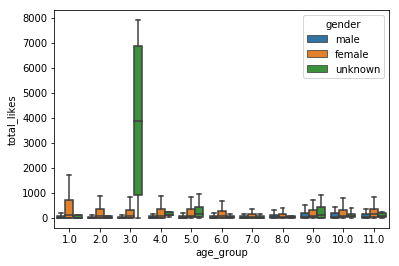

In [32]:
sns.boxplot(x=df.age_group,y=df.total_likes, hue=df.gender, showfliers=False)

### Unknown Gender stands out in the above boxplot - Users of unknown gender in their 30s are going through Significant Facebook activity with the  highest Number of Likes activity. 

In [33]:
#Let us look at only Males and Females - activity for likes

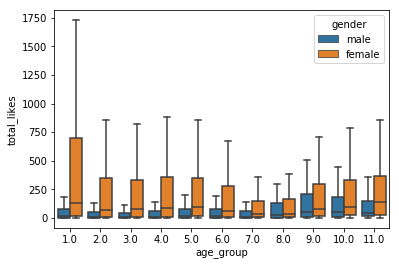

In [34]:
sns.boxplot(x='age_group',y='total_likes',hue='gender',data = df[df.gender!='unknown'], showfliers = False)

### Above boxplot follows similar patterns as the friend count
#### Teenage girls have the highest likes activity followed by women from 20s to 50s  with a drop during early retirement age and a surge after 90yrs
##### For Males- the like activity is minimal - gets slightly higher after 80years. - Men seems to be more of observers than likers ;)


### Overall Popularity Metrics- 

##### 1) Teenage Girls are our best audience! - We can promote related pages, events and Ads and expect to get more hits from these users. We could get Ad sponsors from Teen fashion stores, games, colleges and related areas.

##### 2) Next we could target Users in 20s - males and females 

##### 3) Due to the outstanding activity of Unknown gender in their 30s - we can derive more metrics around what communities they belong to and promote related activities/events/ads

##### 4) Finally due to more likes activity from retirement community - we can promote features accordingly.

#### Next steps- we can check what mediums each of these use and tune our strategies according to the respective application - Mobile or web.



# Medium Analysis

<Figure size 1008x1008 with 0 Axes>

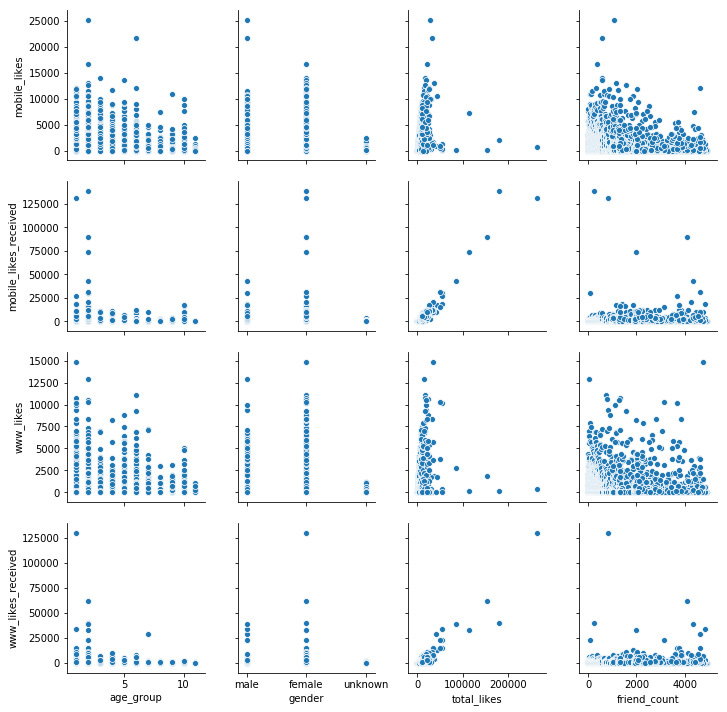

In [35]:
plt.figure(figsize=(14,14))
sns.pairplot(x_vars=['age_group','gender','total_likes','friend_count'], y_vars = ['mobile_likes','mobile_likes_received','www_likes','www_likes_received'], data=df)

In [36]:
df.mobile_likes.describe()

count    99001.000000
mean       106.118272
std        445.257265
min          0.000000
25%          0.000000
50%          4.000000
75%         46.000000
max      25111.000000
Name: mobile_likes, dtype: float64

In [37]:
df[df.mobile_likes!=0].shape[0]

63946

In [38]:
df[df.www_likes!=0].shape[0]

38002

In [39]:
df.www_likes.describe()

count    99001.000000
mean        49.962314
std        285.562930
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max      14865.000000
Name: www_likes, dtype: float64

In [40]:
df['total_mobile_likes'] = df.apply(lambda x: x.mobile_likes+ x.mobile_likes_received, axis=1)

In [41]:
df['total_www_likes'] = df.apply(lambda x: x.www_likes+ x.www_likes_received, axis=1)

In [42]:
df.total_mobile_likes.describe()

count     99001.000000
mean        190.240220
std        1058.051446
min           0.000000
25%           1.000000
50%          13.000000
75%          91.000000
max      140543.000000
Name: total_mobile_likes, dtype: float64

In [43]:
df.total_www_likes.describe()

count     99001.000000
mean        108.531772
std         738.204279
min           0.000000
25%           0.000000
50%           4.000000
75%          37.000000
max      130310.000000
Name: total_www_likes, dtype: float64

# Observation from above pairplot

1) In general there are MORE likes sent than Received - Irrespective of gender/count

2) There is more Activity on FB app on the Mobile than the Website- More than double the activity of website happens on Mobiles

3) Women tend to like more (we already saw that)

4) Website usage is higher by younger crowd - may be the students and again in agegroups 50s-60s

5) Higher friends count does not cause higher likes count

### Based on this we can answer out next question- How to make business improvements per medium usage?

###### 1) We can focus on improving mobile applications primarily - it's used across the age groups so we make it extremely user friendly 
######  2) Websites may be primarily used by younger crows who may be students - We can promote College/courses/exam prep related information or add features that help one sign up for related activities
###### 3) Websites are also used by users between 50-70- right before retirement - may be they access computers more to access facebook could be during breaks at work or other reasons. We could target this audience to cater their interests/needs.
######  4) There is a slight significance of users who turned 100 -- their birthdays could be liked by many and so the like count could have surged. We can promote this feature on fb for more activity



In [44]:
#Function to get Zodiac signs from dob day and month

def getZodiac(row):
    month = row.dob_month
    day = row.dob_day
    if month == 12: 
        astro_sign = 'Sagittarius' if (day < 22) else 'Capricorn'
    elif month == 1: 
        astro_sign = 'Capricorn' if (day < 20) else 'Aquarius'
    elif month == 2: 
        astro_sign = 'Aquarius' if (day < 19) else 'Pisces'
    elif month == 3: 
        astro_sign = 'Pisces' if (day < 21) else 'Aries'
    elif month == 4: 
        astro_sign = 'Aries' if (day < 20) else 'Taurus'
    elif month == 5: 
        astro_sign = 'Taurus' if (day < 21) else 'Gemini'
    elif month == 6: 
        astro_sign = 'Gemini' if (day < 21) else 'Cancer'
    elif month == 7: 
        astro_sign = 'Cancer' if (day < 23) else 'Leo'
    elif month == 8: 
            astro_sign = 'Leo' if (day < 23) else 'Virgo'
    elif month == 9: 
        astro_sign = 'Virgo' if (day < 23) else 'Libra'
    elif month == 10: 
        astro_sign = 'Libra' if (day < 23) else 'Scorpio'
    elif month == 11: 
        astro_sign = 'Scorpio' if (day < 22) else 'Sagittarius'
    else:
        astro_sign = "Unknown"
    return astro_sign


In [45]:
df['zodiac_sign'] = df.apply(getZodiac, axis=1)

In [46]:
df.zodiac_sign.value_counts()

Capricorn      11506
Taurus          8326
Libra           8305
Leo             8280
Cancer          8149
Virgo           8088
Pisces          8058
Aquarius        7992
Gemini          7933
Aries           7619
Sagittarius     7434
Scorpio         7311
Name: zodiac_sign, dtype: int64

In [47]:
# Majority of users are Capricorns - born between end of Dec to end of Jan - They may be more social


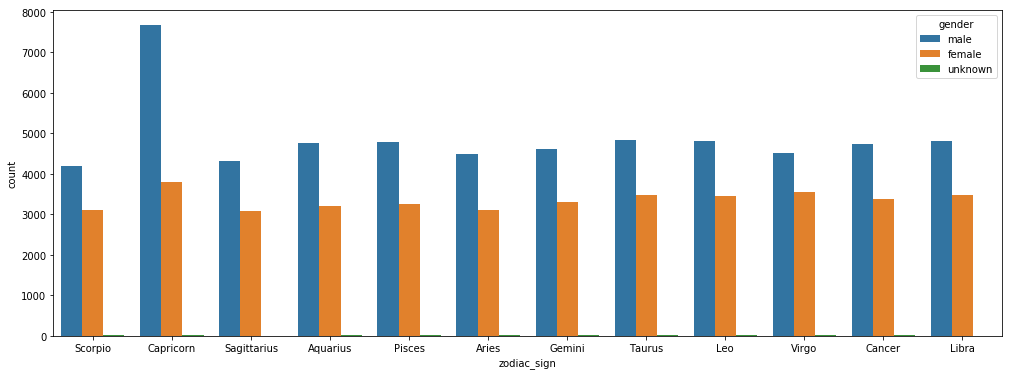

In [48]:
plt.figure(figsize=(17,6))
sns.countplot(df.zodiac_sign, hue=df.gender)


#### We see that there are more male users than females across the signs
### Capricorns being the most social people according to user count


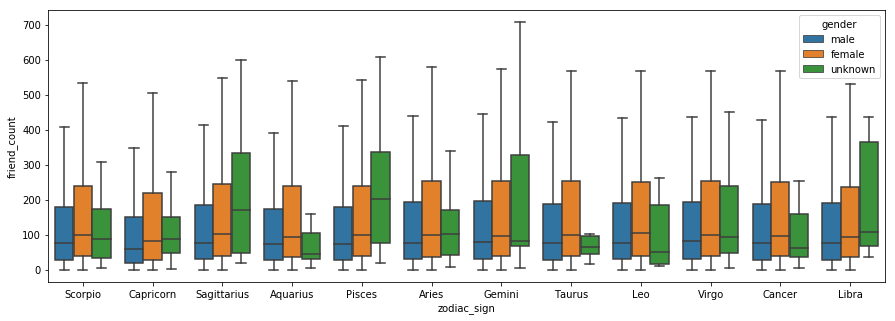

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.zodiac_sign,y=df.friend_count, hue=df.gender, showfliers=False)

In [50]:
# Although Capricorns are the most number of users the friends count metric is not as high as other users

In [51]:
# we see certain signs like Aquarius, Capricorn and Pisces males keep a smaller network compared to few unknonw gender users belonging to
# Saigttarius, Pisces, Gemini and Libra

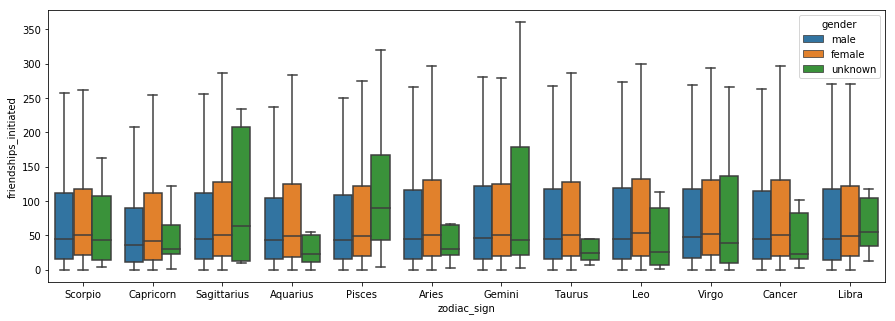

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.zodiac_sign,y=df.friendships_initiated, hue=df.gender, showfliers=False)

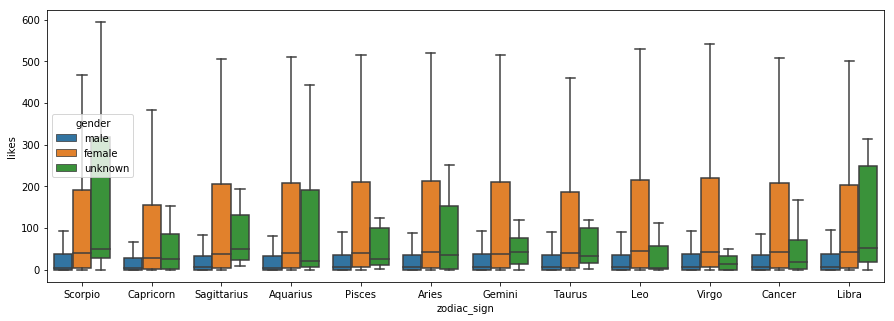

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.zodiac_sign,y=df.likes, hue=df.gender, showfliers=False)

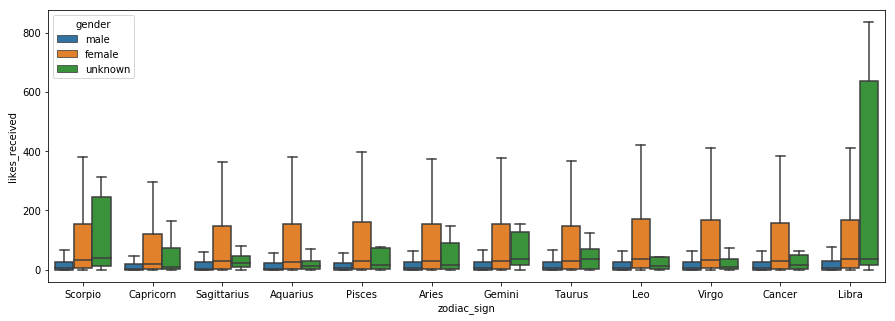

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.zodiac_sign,y=df.likes_received, hue=df.gender, showfliers=False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

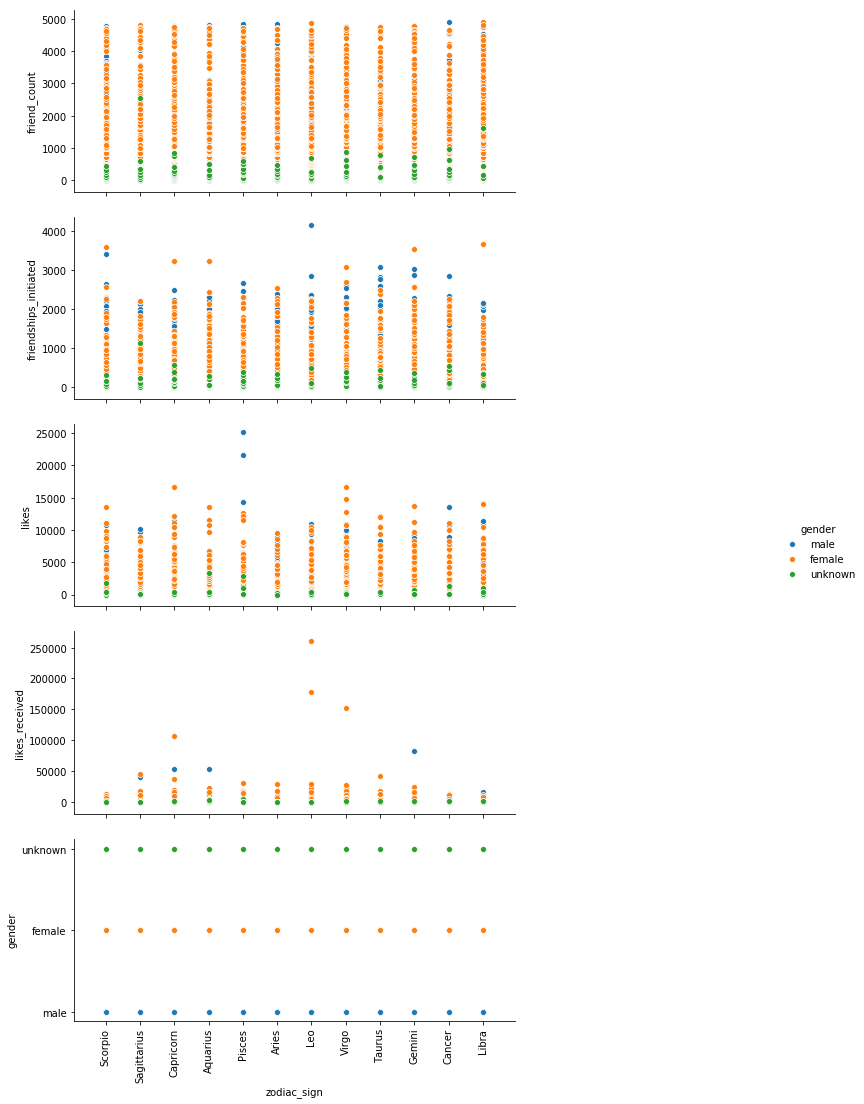

In [55]:
zodiac_plots = sns.pairplot(x_vars=['zodiac_sign'],y_vars=['friend_count','friendships_initiated','likes','likes_received','gender'],data=df, hue='gender')
zodiac_plots.fig.set_size_inches(15,15)
plt.xticks(rotation=90)

In [56]:
# More analysis TBD on Zodiacs..

In [57]:
# We have limited data - if we have more data we can continue analysis on zodiac signs